Storing packshots in folder:
C:\Users\Shithi.Maitra\Unilever Codes\Scraping Scripts\Packshots Chaldal



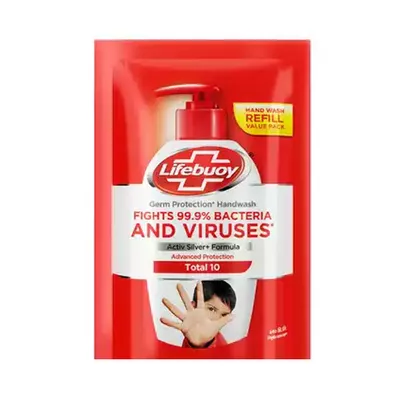

1. LifebuoyHandwashTotalRefill170ml.png | + TS 99.9% BACTERL?  AND VIRUSES  
2. LuxSoapBarSoftGlow35gm.png
3. LuxSoapBarSoftGlow150gm.png
4. RinWashingLiquid800ml.png
5. PureitClassicMicrofibreMesheach.png


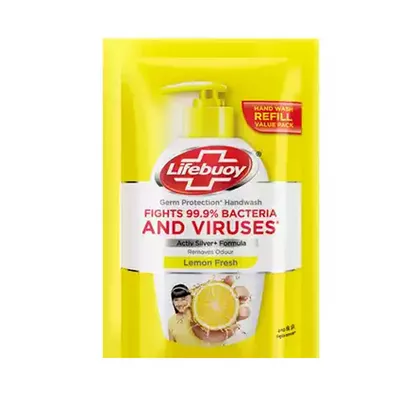

6. LifebuoyHandwashLemonFreshRefill170ml.png | fe sHTS 99.9%, BACTERIE  AND VIRUSES  


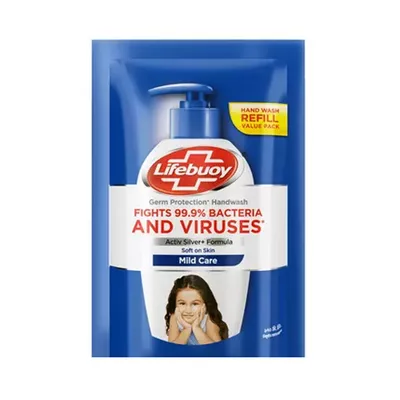

7. LifebuoyHandwashCareRefill170ml.png | (HTS 99.9": BACTERIA  AND VIRUSES  
8. CloseupToothpasteCoolMint145gm.png
9. LifebuoyHandwashLemonFresh1ltr.png
10. PepsodentToothpasteCharcoalWhite90gm.png
11. RinWashingLiquid400ml.png
12. PureitClassicGermKillKit1500ltr.png
13. LifebuoyHandwashTotalBottlle1ltr.png
14. SunsilkConditionerPerfectStraight80ml.png
15. RinAdvancedDetergentPowder2kg.png


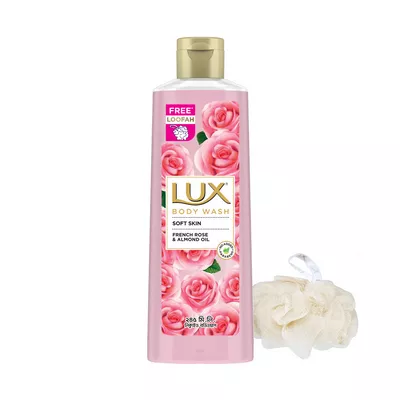

16. LuxBodyWashFrenchRoseAndAlmondOil(FreeLoofah)245ml.png | Ios Sera 
17. PureitClassicGermKillKit3000ltr.png
18. CloseupToothpasteMentholFresh100gm.png
19. LifebuoyHandwashTotal5ltr.png


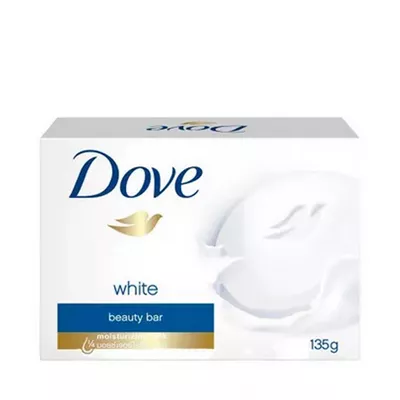

20. DoveBeautyBarWhite135gm.png | 1Bbg, 


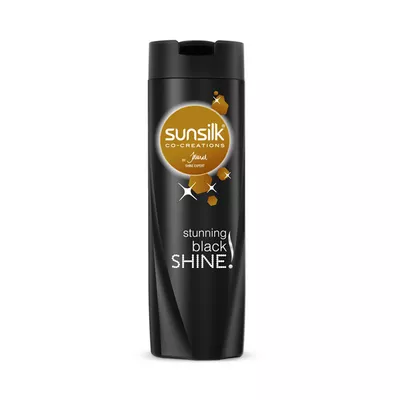

21. SunsilkShampooStunningBlackShine330ml.png | stunning,  
22. DomexToiletCleaningLiquidLimeFresh(FreeBucket)750ml.png
23. KnorrCrispyFriedChickenMix75gm.png
24. DoveBeautyBarWhite90gm.png
25. StandardHorlicksHealthAndNutritionDrinkJar500gm.png
26. GlucomaxDBib200gm.png


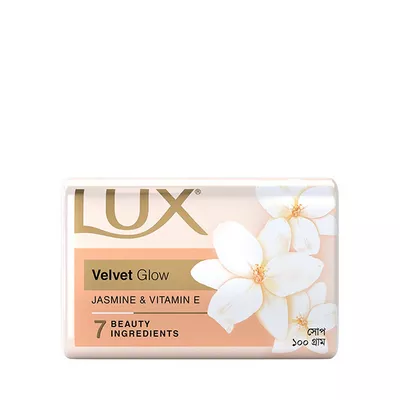

27. LuxSoapBarVelvetGlow100gm.png | i ibd  Velvet Glow x ‘JASMINE 8 VITAMI E  peauTy INeReDiENTs  
28. SunsilkShampooHairFallSolution330ml.png


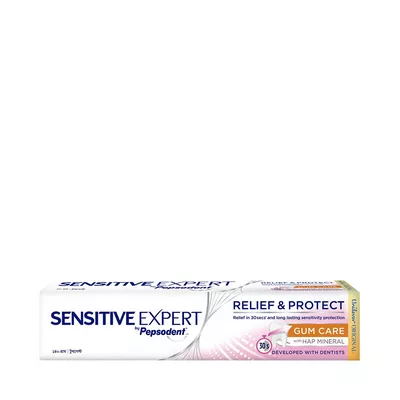

29. PepsodentToothpasteSensitiveExpertGumCare140gm.png | RELIEF & PROTECT  SENSITIVE EXPERT “Repsodeat  


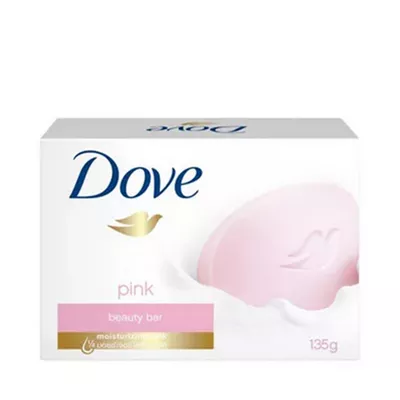

30. DoveBeautyBarPink135gm.png | Dove  ar. = 
31. SunsilkShampooHairFallSolution170ml.png
32. SunsilkShampooLusciouslyThick&Long170ml.png
33. PepsodentToothpasteKidsStrawbery45gm.png
34. HorlicksChocolateFlavourJar500gm.png
35. StandardHorlicksHealthAndNutritionDrinkJar250gm.png
36. TresemméShampooColorRevitalise(FreeTresemméKeratinSmoothConditioner50ml)580ml.png


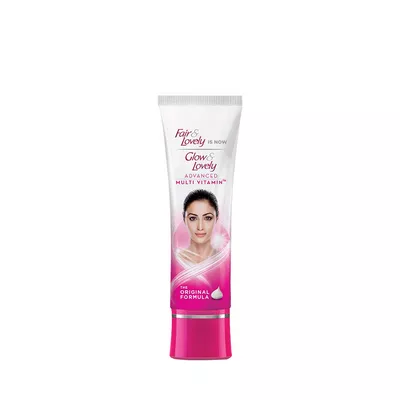

37. Glow&LovelyAdvancedMultiVitaminCream50gm.png | a 
38. LifebuoyHandwashTotalPump200ml.png


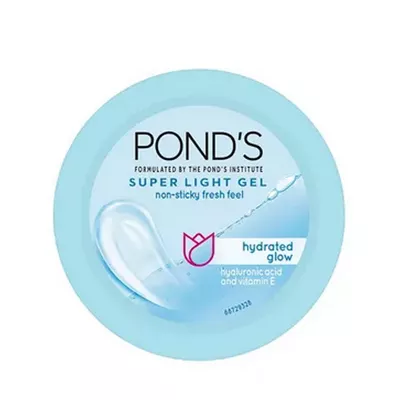

39. PondsSuperLightGel98gm.png | POND'S  SUPER LIGHT GEL nerestety hesh feel  ryarared glow  
40. SunsilkShampooStunningBlackShine170ml.png


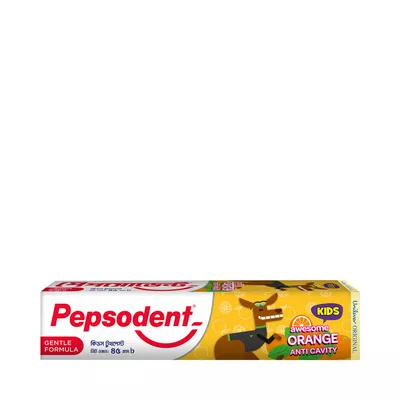

41. PepsodentAwesomeOrangeToothpaste45gm.png | Pepsodent. ED cg  


KeyboardInterrupt: 

In [1]:
# import
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import requests
import warnings
from pathlib import Path
import cv2
import pytesseract
from PIL import Image
import zipfile
import win32com.client

# preference
warnings.filterwarnings("ignore")
pytesseract.pytesseract.tesseract_cmd = r"C:\Users\Shithi.Maitra\AppData\Local\Programs\Tesseract-OCR\tesseract.exe"

# folder: C:\Users\Shithi.Maitra\Unilever Codes\Scraping Scripts\Packshots Chaldal
folder = "Packshots Chaldal"
filenames = []
output_dir = Path.cwd() / folder
output_dir.mkdir(parents=True, exist_ok=True)
folder_zip = zipfile.ZipFile(folder + ".zip", 'w')

# open window
driver = webdriver.Chrome("chromedriver", options=[])
driver.maximize_window()

# link
link = "https://chaldal.com/unilever"
driver.get(link)

# scroll
SCROLL_PAUSE_TIME = 5
last_height = driver.execute_script("return document.body.scrollHeight")
while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(SCROLL_PAUSE_TIME)
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height: break
    last_height = new_height
    
# soup
soup_init = BeautifulSoup(driver.page_source, "html.parser")
soup = soup_init.find_all("div", attrs={"class": "imageWrapper"})

# close window
driver.close()

# scrape
print("Storing packshots in folder:\n" + str(output_dir) + "\n")
img_count = len(soup)
for i in range(0, img_count):

    # SKU
    try: val = soup[i].find("div", attrs={"class": "name"}).get_text()
    except: val = ""
    sku = "" + val
    try: val = soup[i].find("div", attrs={"class": "subText"}).get_text()
    except: val = ""
    sku = sku + " " + val

    # packshot
    img_link = soup[i].find("img")["src"]    
    img_data = requests.get(img_link, verify=False).content

    # save
    filename = sku.replace(' ', "") + ".png"
    filenames.append(filename)
    filepath = str(output_dir) + "\\" + filename
    folder_zip.writestr(filename, img_data)
    with open(filepath, "wb") as handler: handler.write(img_data)

    # OCR 
    try: 
        img = cv2.imread(filepath)
        img = cv2.bitwise_not(img)
        _, binary = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)
        txt = pytesseract.image_to_string(binary, config="--oem 3 --psm 4", lang="eng").replace('\n', ' ')
        if txt != "": txt = " | " + txt
    except: txt = ""
    if txt != "": display(Image.open(filepath))
    
    # report
    print(str(i+1) + ". " + filename + txt)

# zip
folder_zip.close()

In [ ]:
# email
ol = win32com.client.Dispatch("outlook.application")
olmailitem = 0x0
newmail = ol.CreateItem(olmailitem)

# subject, recipients
newmail.Subject = "Packshot Images"
newmail.To = 'shithi.maitra@unilever.com; maitra.shithi.aust.cse@gmail.com'
# newmail.To = 'avra.barua@unilever.com;'
# newmail.To = 'mehedi.asif@unilever.com'
# newmail.CC = 'safa-e.nafee@unilever.com;'

# inline
shot1_html = f'<img src="cid: MyId1" style="border: 1px solid; padding: 5px; background-color: white; display: block" width="97px" height="100px"><figcaption><b>Fig.</b> ' + filenames[0][:8] + '...' + '</figcaption>'
shot2_html = f'<img src="cid: MyId2" style="border: 1px solid; padding: 5px; background-color: white; display: block" width="97px" height="100px"><figcaption><b>Fig.</b> ' + filenames[1][:8] + '...' + '</figcaption>'
shot3_html = f'<img src="cid: MyId3" style="border: 1px solid; padding: 5px; background-color: white; display: block" width="97px" height="100px"><figcaption><b>Fig.</b> ' + filenames[2][:8] + '...' + '</figcaption>'
shot4_html = f'<img src="cid: MyId4" style="border: 1px solid; padding: 5px; background-color: white; display: block" width="97px" height="100px"><figcaption><b>Fig.</b> ' + filenames[3][:8] + '...' + '</figcaption>'
shot5_html = f'<img src="cid: MyId5" style="border: 1px solid; padding: 5px; background-color: white; display: block" width="97px" height="100px"><figcaption><b>Fig.</b> ' + filenames[4][:8] + '...' + '</figcaption>'

# body
newmail.HTMLbody = f'''
Dear concern,<br><br>
Packshot images from <a href="https://chaldal.com/unilever">Chaldal's UBL page</a> are scraped, per a former requirement. Some examples found in the process are displayed below:<br>
<br>
<table style="margin-left: auto; margin-right: auto">
    <tr><td>''' + shot1_html + '''</td><td>''' + shot2_html + '''</td><td>''' + shot3_html + '''</td><td>''' + shot4_html + '''</td><td>''' + shot5_html + '''</td></tr>
</table>
<br>
The images are in <i>.png</i> and no changes have been applied to the dimensions. Please find the attached <i>.zip</i>. This email was auto generated using <i>win32com</i>.<br><br>
Thanks,<br>
Shithi Maitra<br>
Asst. Manager, Cust. Service Excellence<br>
Unilever BD Ltd.<br>
'''

# attach
filename = str(Path.cwd()) + "\\" + folder + ".zip"
newmail.Attachments.Add(filename)

# embed
newmail.Attachments.Add(str(output_dir) + "\\" + filenames[0]).PropertyAccessor.SetProperty("http://schemas.microsoft.com/mapi/proptag/0x3712001F", "MyId1")
newmail.Attachments.Add(str(output_dir) + "\\" + filenames[1]).PropertyAccessor.SetProperty("http://schemas.microsoft.com/mapi/proptag/0x3712001F", "MyId2")
newmail.Attachments.Add(str(output_dir) + "\\" + filenames[2]).PropertyAccessor.SetProperty("http://schemas.microsoft.com/mapi/proptag/0x3712001F", "MyId3")
newmail.Attachments.Add(str(output_dir) + "\\" + filenames[3]).PropertyAccessor.SetProperty("http://schemas.microsoft.com/mapi/proptag/0x3712001F", "MyId4")
newmail.Attachments.Add(str(output_dir) + "\\" + filenames[4]).PropertyAccessor.SetProperty("http://schemas.microsoft.com/mapi/proptag/0x3712001F", "MyId5")

# send
newmail.Send()